*Ссылки на заголовки на github не работают*

**Исследование рынка видеоигр**
_____
**Описание исследования.**

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
_____
**Цель исследования.**
    
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
_____
**Исходные данные.**
    
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#Подготовка-данных)

***Часть 2. Подготовка данных:***
* [1. Замена названий столбцов (приведение к нижнему регистру)](#Замена-названий-столбцов)
* [2. Приведение данных к нужным типам.](#Преобразование-данных-в-нужные-типы)
* [3. Нахождение и ликвидация пропусков.](#Обработка-пропусков)
* [4. Обработка дубликатов.](#Обработка-дубликатов)
* [5. Подсчёт суммарных продаж](#Посчитаем-суммарные-продажи)

***Часть 3. Исследовательский анализ данных:***
* [1. Сколько игр выпускалось в разные годы](#Сколько-игр-выпускалось-в-разные-годы)
* [2. Изменение продаж по платформам](#Изменение-продаж-по-платформам)
* [3. Выбор данных для актуального периода](#Выбор-данных-для-актуального-периода)
* [4. Выбор потенциально прибыльных платформ](#Выбор-потенциально-прибыльных-платформ)
* [5. «Ящик с усами» по глобальным продажам игр в разбивке по платформам](#«Ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам)
* [6. Влияние отзывов на продажи](#Влияние-отзывов-на-продажи)
* [7. Распределение игр по жанрам](#Распределение-игр-по-жанрам)

***Часть 4. Портрет пользователя каждого региона:***
* [1. Самые популярные платформы (топ-5) в долях продаж в разных регионах](#Самые-популярные-платформы-(топ-5)-в-долях-продаж-в-разных-регионах)
* [2. Самые популярные жанры (топ-5) в долях продаж в разных регионах](#Самые-популярные-жанры-(топ-5)-в-долях-продаж-в-разных-регионах)
* [3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#Влияет-ли-рейтинг-ESRB-на-продажи-в-отдельном-регионе?)

***[Часть 5. Общий вывод](#Общий-вывод)***

# Исследование рынка видеоигр

## Откроем файл с данными и изучим общую информацию

In [338]:
# Загрузка библиотек
!pip install jupyter-black -q
import jupyter_black

jupyter_black.load()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]
import seaborn as sns
import warnings
import os

**Загружаем данные из файла в датафрейм:**

In [396]:
pth1 = "https://code.s3.yandex.net/datasets/games.csv"
pth2 = "games.csv"

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print("Something is wrong")

**Выводим первые 20 строчек датафрейма:**

In [389]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выведем основную информацию о датафрейме:**

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В большом числе столбцов данных нашего датафрейма есть пропуски. 

## Подготовка данных

### Замена названий столбцов

In [409]:
df.columns = df.columns.str.lower()

### Преобразование данных в нужные типы

Переведём `year_of_release` в целочисленный тип, так как год не должен быть дробью:

In [412]:
df["year_of_release"] = df["year_of_release"].astype("Int64")

Переведём `user_score` в числовой формат для вычислений:

In [176]:
# df["user_score"] = pd.to_numeric(df["user_score"])

Вылезла ошибка из-за "tbd" в столбце `user_score`, используем errors='coerce'

In [178]:
df["user_score"] = pd.to_numeric(df["user_score"], errors="coerce")

Переведём `critic_score` в целочисленный тип, потому что в столбце не дробных значений:

In [180]:
# df["critic_score"] = df["critic_score"].astype("Int64")

### Обработка пропусков

Имеем одинаковые пару пропусков в `name` и `genre`:

In [182]:
df[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


`<NA>` в годе выпуска. До половины пропусков в `critic_score`, `user_score` и `rating`.
Заполять данные пропуски нечем, так как это индивидуальные параметры, без устойчивой связи с другими столбцами. 
Часть пропусков отпадёт, когда будем делать срез акуального периода.

Много значений "tbd" в столбце `user_score`:

In [184]:
df["user_score"].value_counts(dropna=False)

user_score
NaN    9125
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0.0       1
9.7       1
Name: count, Length: 96, dtype: int64

TBD означает «To Be Determined», то есть оценка будет определена позже. По сути, это то же самое, что и пропуск. То есть логично заменить эти значения на пропуски. Здесь поможет метод replace. Получить пропуск можно с помощью математической библиотеки numpy. Можем использовать np.NaN в качестве аргумента на замену в методе replace().

In [186]:
df["user_score"] = df["user_score"].replace("tbd", np.NaN)

### Обработка дубликатов

Посчитаем явные дубликаты

In [188]:
df.duplicated().sum()

0

Пробуем найти дубликаты для пары "Имя - Игровая консоль"

In [190]:
df[df.duplicated(["name", "platform"])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [192]:
# Изучим подробнее одну из строк:
df[df["name"] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


В данном случае дубликата нет: это разные игры с одинаковым названием, так как ремейк назвали точно так же и выпустили на тех же платформах. 
Несколько записей из 17 тысяч имеют ничтожно малое влияние, а также нужно делать срез актуального периода, поэтому обработку заканчиваю.

### Посчитаем суммарные продажи 

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец, они нам пригодятся для дальнейшего анализа по жанрам и платформам.

In [194]:
df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

In [196]:
# Выведем несколько строк измененного датасета:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

Что в нашем случае мы считаем выпуском игры (в этом, некоем году)? Чтобы получить истинное количество «игр по годам» нам следует поискать дубликаты (используя subset по (Годам - Названиям игр) и затем исключить из полного датафрейма все дубли за исключением одной, «первой», строки.

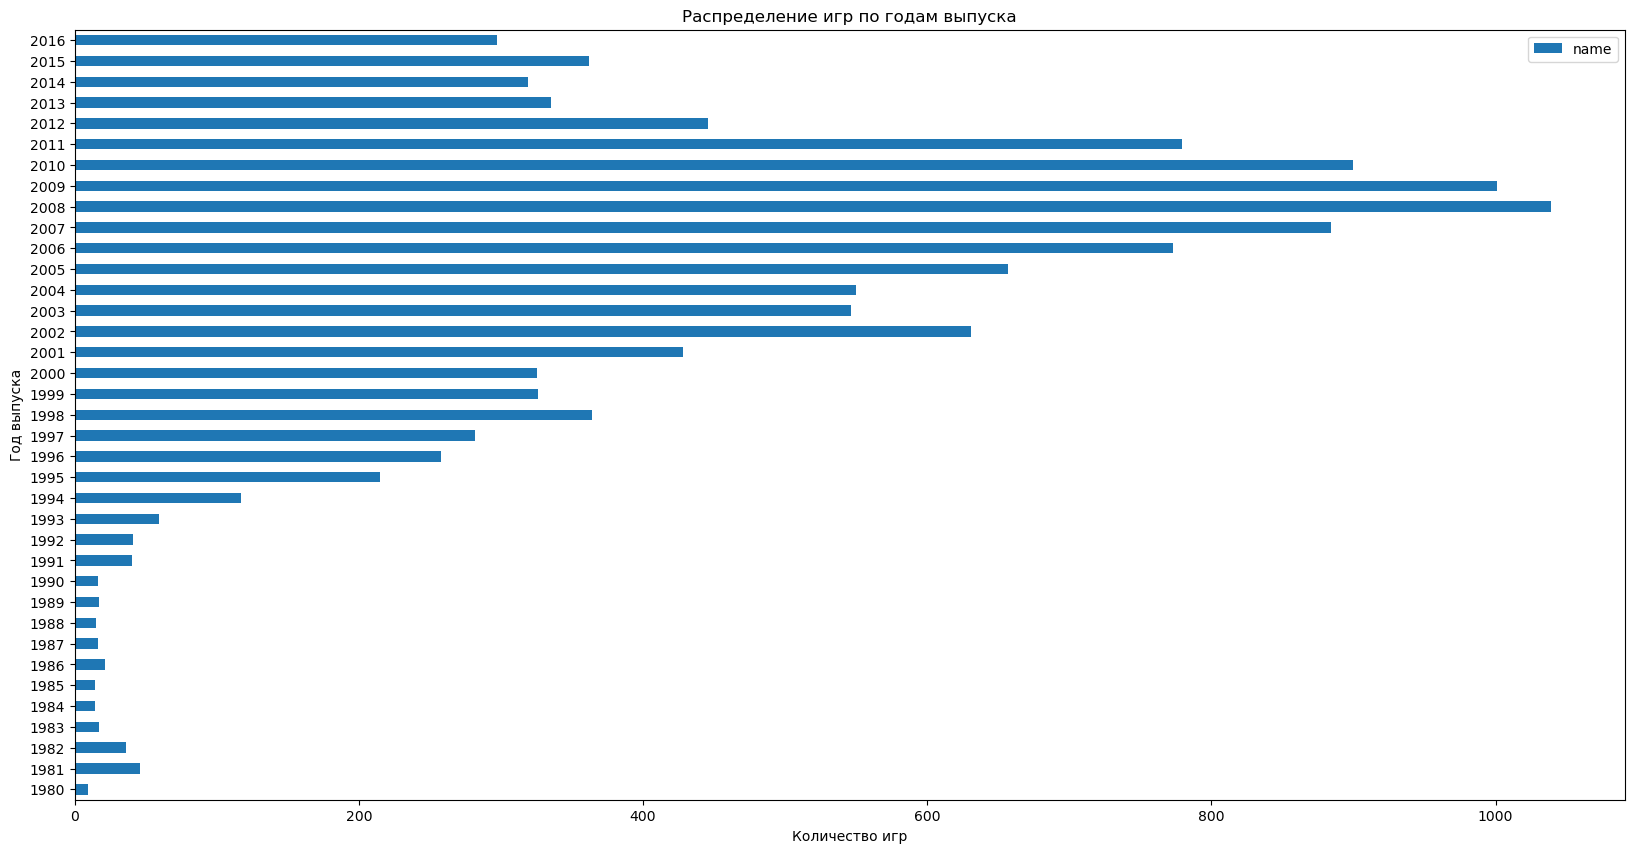

In [198]:
# Удалим дубликаты
games = df.drop_duplicates(subset=["year_of_release", "name"], keep="first")

games.pivot_table(index="year_of_release", values="name", aggfunc="count").plot(
    kind="barh", figsize=(20, 10)
)
plt.title("Распределение игр по годам выпуска")
plt.xlabel("Количество игр")
plt.ylabel("Год выпуска");

Количество выпускаемых игр достигло пика около 2008-2009 годов, а затем резко упалл. Это поднимает несколько интересных вопросов: что привело к взрыву в конце 1990-х годов и что привело к спаду, начавшемуся в конце 2000-х годов?

Одним из самых важных изменений, произошедших в середине 90-х, стал переход от растровой графики к трехмерной. Это дало начало жанрам, которых ранее не существовало, таким как шутеры от первого лица, стратегии в реальном времени и MMO. Такие консоли, как первая Playstation и Nintendo 64, продавались в этот период времени и открыли более современную форму видеоигр с трехмерной графикой и обработкой, которые предыдущие консоли не могли выполнить.</font>

### Изменение продаж по платформам

Выберем платформы с наибольшими суммарными продажами:

In [200]:
tmp = df.pivot_table(index="platform", values="total_sales", aggfunc="sum").sort_values(
    "total_sales", ascending=False
)

tmp.index[:10].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [202]:
top_10_sales = df.query(
    "platform in ('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC')"
)

Построим распределение по годам:

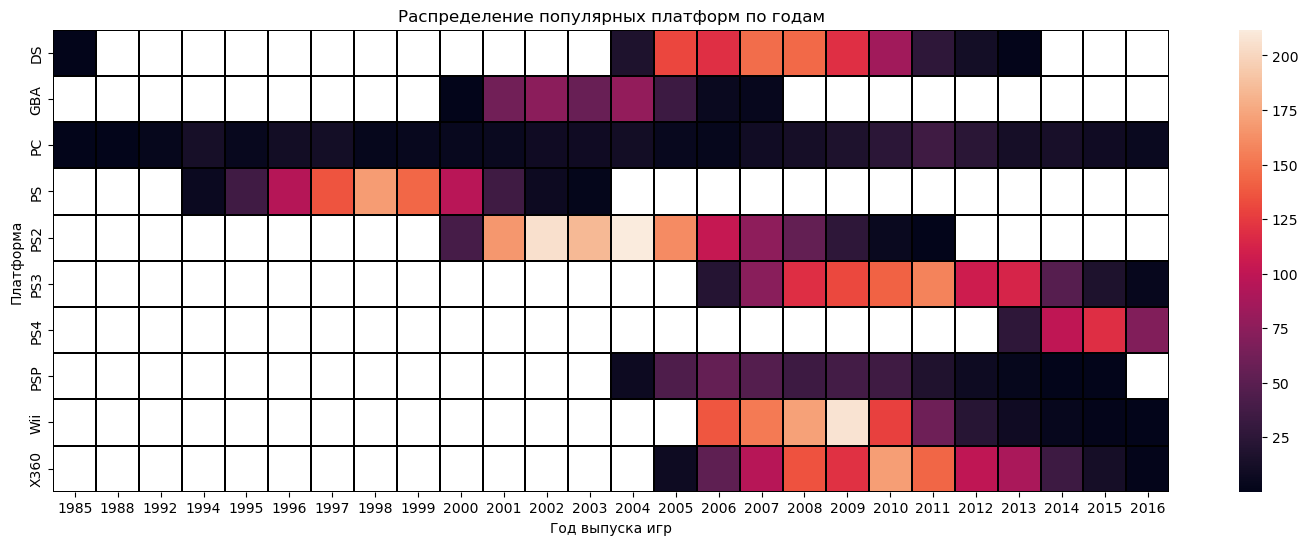

In [204]:
pivot = top_10_sales.pivot_table(
    index="platform", columns="year_of_release", values="total_sales", aggfunc="sum"
)
plt.figure(figsize=(18, 6))
sns.heatmap(data=pivot, linewidths=0.3, linecolor="black")
plt.title("Распределение популярных платформ по годам")
plt.xlabel("Год выпуска игр")
plt.ylabel("Платформа")
plt.show()

На тепловой карте видно, что срок жизни игровой платформы где-то 10 лет, не считая PC. Конец данных не означает конец жизни платформы, как видно с PS4.
Кстати, ячейка DS 1985г наверняка явлется ошибкой данных.

### Выбор данных для актуального периода

Пусть актуальный период будет 3 года, раз актуальное поколение приставок вышло в конце 2013 в большинстве регионов. Сделаем срез данных за этот срок. Эти данные помогут построить прогноз на 2017 год.

In [206]:
data = df.query("year_of_release > 2013").reset_index(drop=True)
data.info()
# Скроем лишние предупреждения
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 160.1+ KB


C:\Users\Alex\AppData\Local\Temp\ipykernel_19192\56585180.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data = df.query("year_of_release > 2013").reset_index(drop=True)


### Выбор потенциально прибыльных платформ

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [208]:
platform_sales = (
    data.groupby(["platform", "year_of_release"])["total_sales"]
    .sum()
    .unstack()
    .fillna(0)
)
platform_sales

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,0.00
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


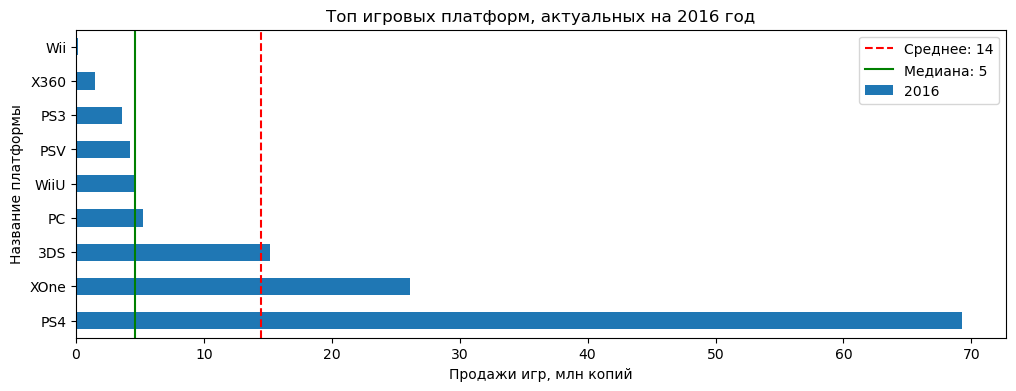

In [210]:
profitable_platforms = platform_sales.sort_values(by=2016, ascending=False).head(9)
profitable_platforms[2016].plot(kind="barh", figsize=(12, 4))
plt.title("Топ игровых платформ, актуальных на 2016 год")
plt.xlabel("Продажи игр, млн копий")
plt.ylabel("Название платформы")
mean_sales = profitable_platforms[2016].mean()
median_sales = profitable_platforms[2016].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.0f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.0f}"
)
plt.legend()
plt.show()

Взглянем на тепловую карту на актуальном периоде:

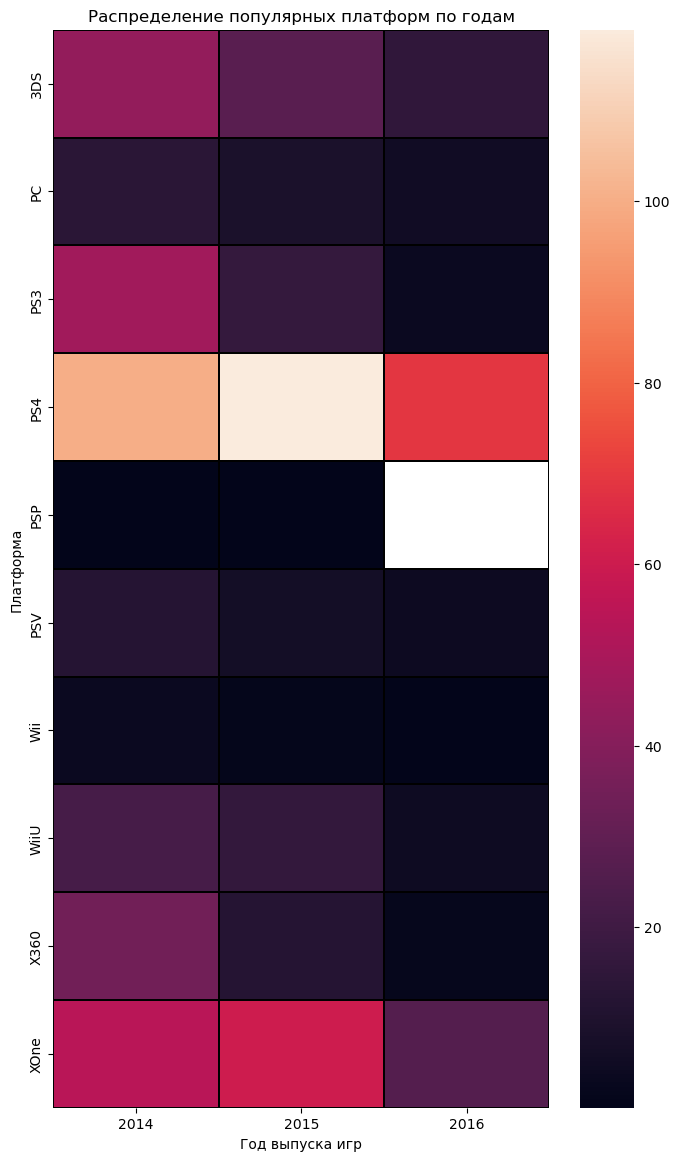

In [212]:
pivot = data.pivot_table(
    index="platform", columns="year_of_release", values="total_sales", aggfunc="sum"
)
plt.figure(figsize=(8, 14))
sns.heatmap(data=pivot, linewidths=0.3, linecolor="black")
plt.title("Распределение популярных платформ по годам")
plt.xlabel("Год выпуска игр")
plt.ylabel("Платформа")
plt.show()

Все платформы падают по продажам игр - такой период рынка, можно было бы сказать, но известно, что данные за последний год неполные. Это значит, что PS4 и XOne могут оказать на восходящем тренде к концу года. Можно выделить потенциально прибыльные платформы:
* PS4;
* XOne;
* 3DS;
* PC - жизненный цикл не ограничен.

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

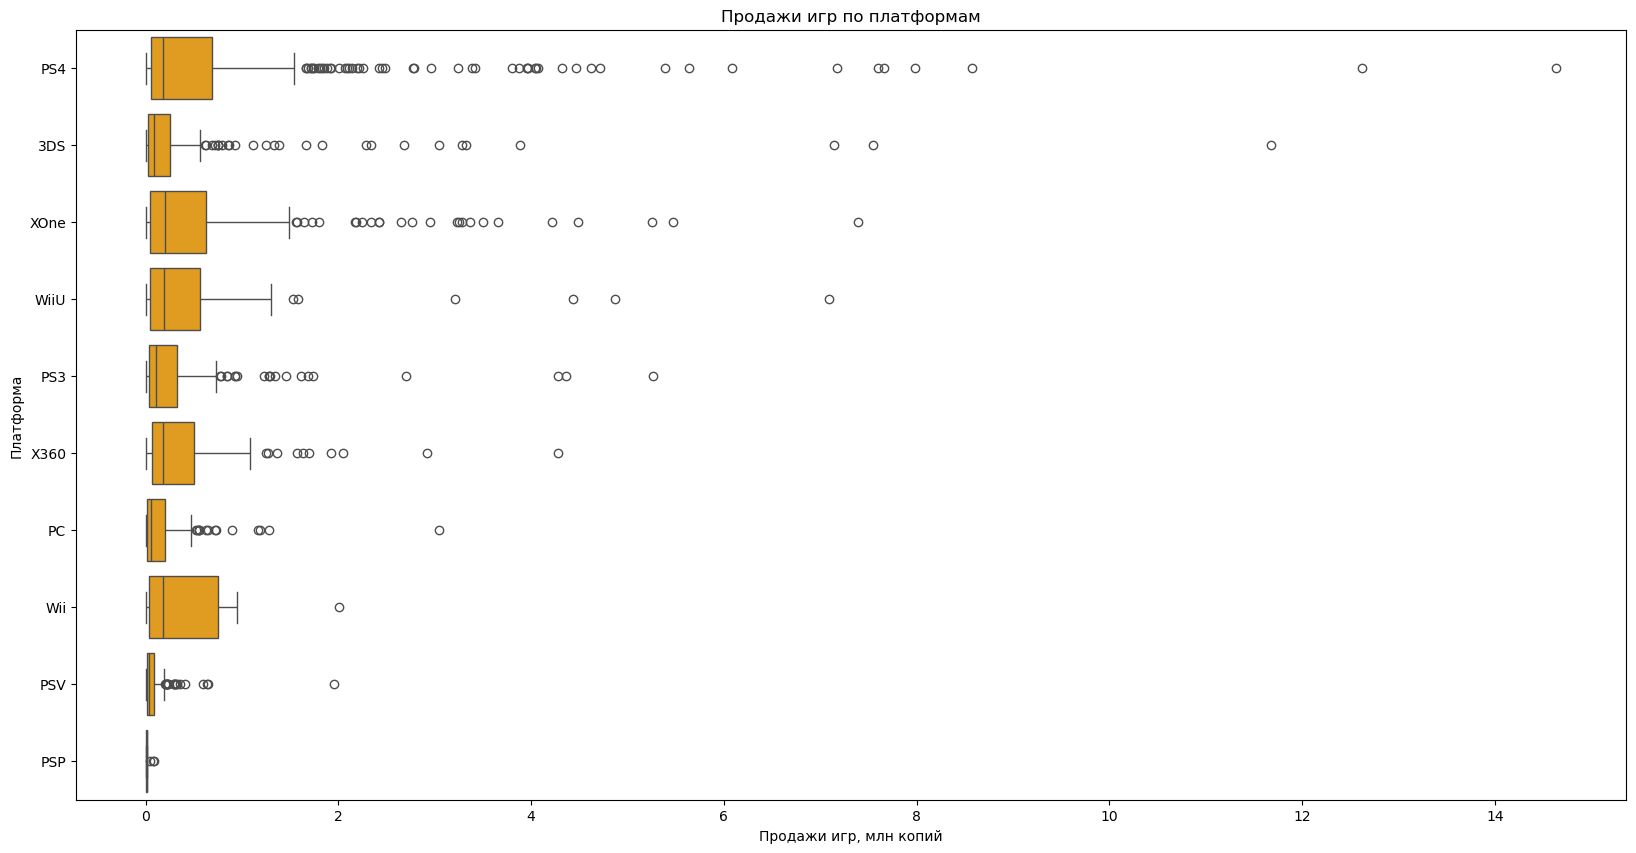

In [214]:
plt.figure(figsize=[20, 10])
sns.boxplot(x="total_sales", y="platform", data=data, color="orange", orient="h")
plt.title("Продажи игр по платформам")
plt.xlabel("Продажи игр, млн копий")
plt.ylabel("Платформа")
plt.show()

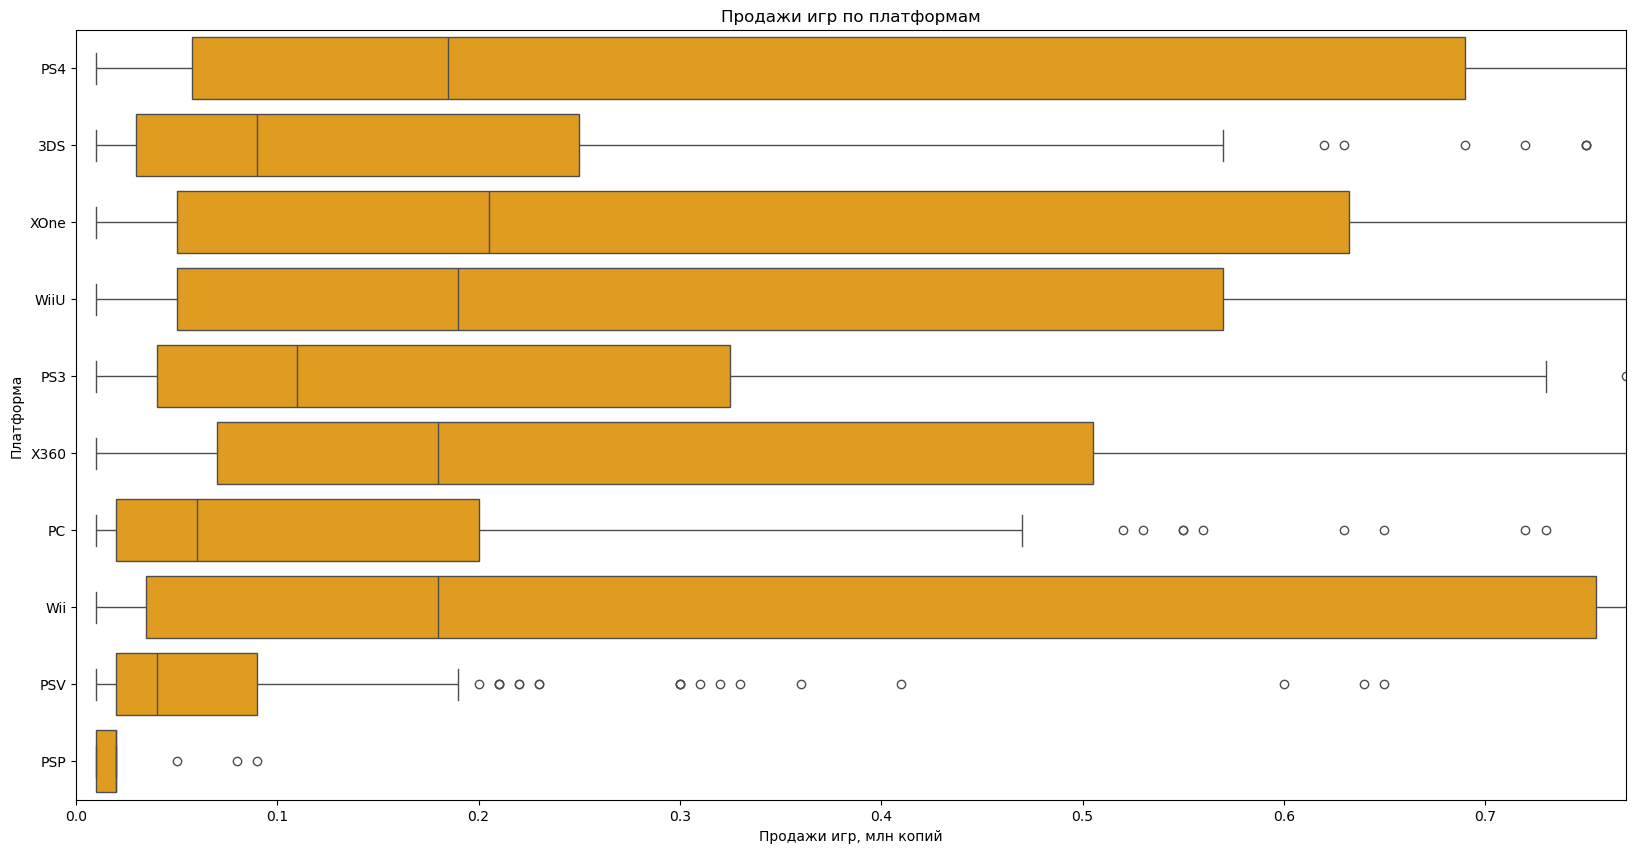

In [216]:
# Приближаем ящики
plt.figure(figsize=[20, 10])
sns.boxplot(x="total_sales", y="platform", data=data, color="orange", orient="h")
plt.title("Продажи игр по платформам")
plt.xlabel("Продажи игр, млн копий")
plt.ylabel("Платформа")
plt.xlim(0, 0.77)
plt.show()

In [218]:
# Рассмотрим значения подробнее
data.query('platform == "PS4"')["total_sales"].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [220]:
data.query('platform == "WiiU"')["total_sales"].describe()

count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64

In [222]:
data.query('platform == "XOne"')["total_sales"].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Большинство игр на конкретной платформе продают до 880 тысяч копий (X360), выбросы же превышают 14 млн. Самый большой размах у PS4, а самый маленький у PSP. Игры на платформах PS3, PS4, X360, Xone, WiiU, Wii обычно продают по 185-205 тысяч копий (медиана).

Платформы по величине медианных продаж по убыванию:
* XOne;
* WiiU;
* PS4;
* Wii и X360;
* PS3
и т.д.

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Понимание структуры данных на самом деле дает нам основание использовать метод Спирмена/Кендалла, а не Пирсона (при оценки степени корреляции признаков), так как помогает избавиться от влияния выбросов.

In [224]:
PS4 = data.query('platform == "PS4"')

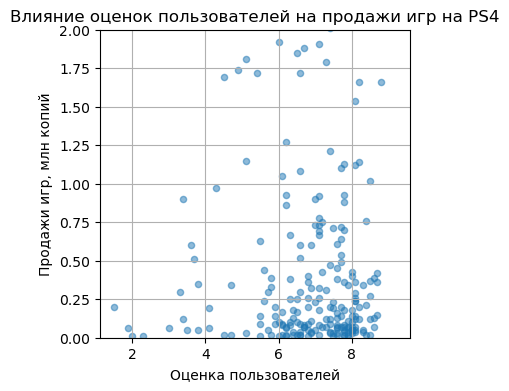

In [226]:
PS4.plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    alpha=0.5,
    grid=True,
)
plt.title("Влияние оценок пользователей на продажи игр на PS4")
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи игр, млн копий")
plt.ylim(0, 2)
plt.show()

In [228]:
# Корреляция между отзывами пользователей и продажами
from scipy import stats

res = stats.spearmanr(PS4["user_score"], PS4["total_sales"], nan_policy="omit")
res.statistic

-0.005280356931170989

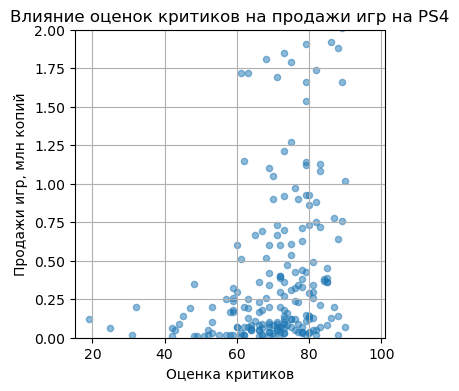

In [230]:
PS4.plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    alpha=0.5,
    grid=True,
)
plt.title("Влияние оценок критиков на продажи игр на PS4")
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи игр, млн копий")
plt.ylim(0, 2)
plt.show()

In [232]:
# Корреляция между отзывами критиков и продажами
from scipy import stats

res = stats.spearmanr(PS4["critic_score"], PS4["total_sales"], nan_policy="omit")
res.statistic

0.5035124220995204

Оценки пользователей не коррелируют с продажами игр на платформе PS4. Оценки критиков же средне коррелируют с продажами игр. Сравним данные выводы с продажами игр на принципиально другой платформе - PC.

In [234]:
PC = data.query('platform == "PC"')

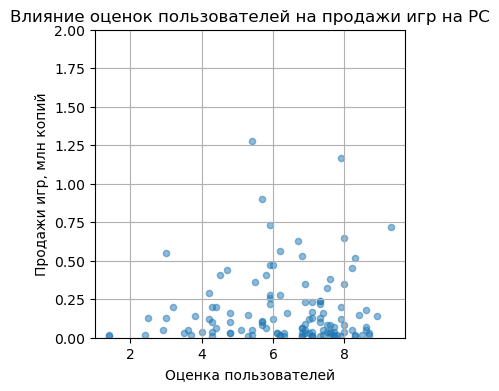

In [236]:
PC.plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    alpha=0.5,
    grid=True,
)
plt.title("Влияние оценок пользователей на продажи игр на PC")
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи игр, млн копий")
plt.ylim(0, 2)
plt.show()

In [238]:
# Корреляция между отзывами пользователей и продажами
from scipy import stats

res = stats.spearmanr(PC["user_score"], PC["total_sales"], nan_policy="omit")
res.statistic

-0.060213991842501105

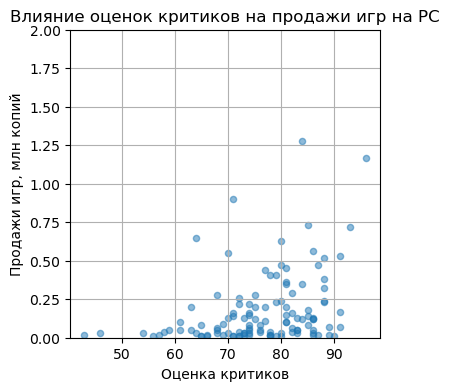

In [240]:
PC.plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    alpha=0.5,
    grid=True,
)
plt.title("Влияние оценок критиков на продажи игр на PC")
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи игр, млн копий")
plt.ylim(0, 2)
plt.show()

In [242]:
# Корреляция между отзывами критиков и продажами
from scipy import stats

res = stats.spearmanr(PC["critic_score"], PC["total_sales"], nan_policy="omit")
res.statistic

0.34077463748419223

По PC можно несколько иные выводы. Отзывы пользователей не коррелируют с продажами общей массы игр. Отзывы критиков имеют очень слабую связь. Сравним с другими популярными платформами:

In [244]:
platform = ["PS3", "XOne", "3DS", "X360", "WiiU"]


def user_corr(platform):
    res = stats.spearmanr(
        data.query("platform == @platform")["user_score"],
        data.query("platform == @platform")["total_sales"],
        nan_policy="omit",
    )
    print(f"Корреляция оценок пользователей с продажами для {platform}")
    display(res.statistic)
    print()


for i in platform:
    user_corr(i)

Корреляция оценок пользователей с продажами для PS3


-0.08245588096182827


Корреляция оценок пользователей с продажами для XOne


-0.07614016867771538


Корреляция оценок пользователей с продажами для 3DS


0.1360656611137385


Корреляция оценок пользователей с продажами для X360


-0.1169205588562938


Корреляция оценок пользователей с продажами для WiiU


0.4460271424972337

In [246]:
def critic_corr(platform):
    res = stats.spearmanr(
        data.query("platform == @platform")["critic_score"],
        data.query("platform == @platform")["total_sales"],
        nan_policy="omit",
    )
    print(f"Корреляция оценок критиков с продажами для {platform}")
    display(res.statistic)
    print()


for i in platform:
    critic_corr(i)

Корреляция оценок критиков с продажами для PS3


0.5065395281436684


Корреляция оценок критиков с продажами для XOne


0.5450763498170513


Корреляция оценок критиков с продажами для 3DS


0.37638213035971174


Корреляция оценок критиков с продажами для X360


0.5802364184238022


Корреляция оценок критиков с продажами для WiiU


0.4536554342421588

Корреляция оценок пользователей с продажами для всех платформ отсутствует, кроме WiiU, которая имеет слабую корреляцию.

Корреляция оценок критиков с продажами является слабой для WiiU и 3DS. У трёх других платформ корреляция средняя.

### Распределение игр по жанрам

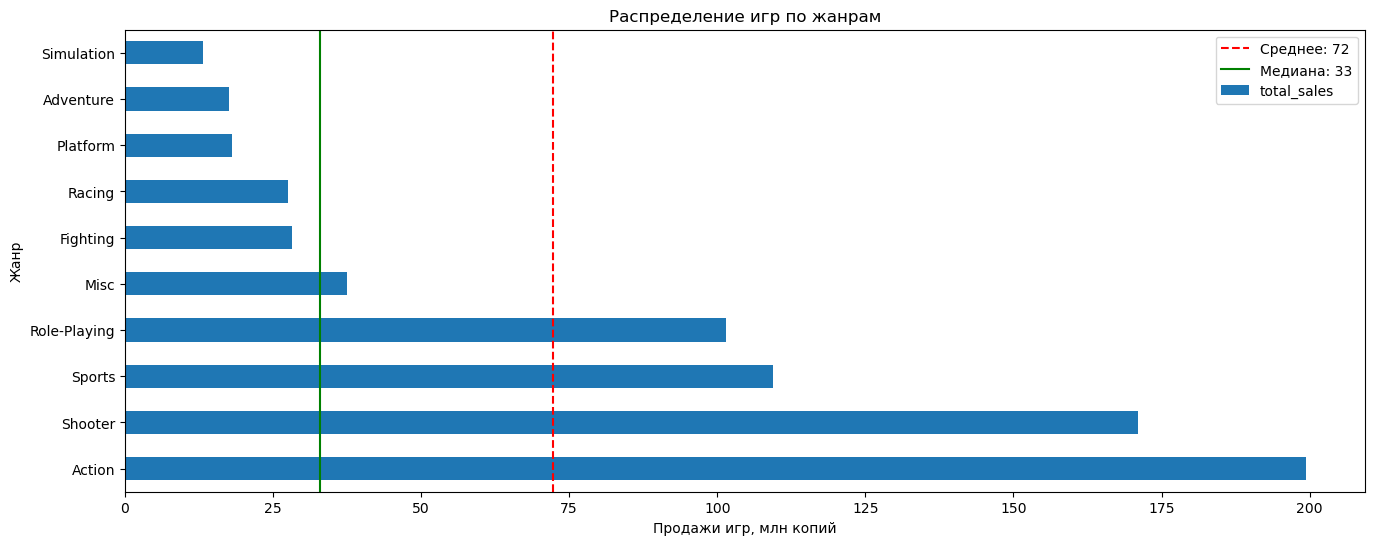

In [248]:
top_genres = (
    data.pivot_table(index="genre", values="total_sales", aggfunc="sum")
    .sort_values(by="total_sales", ascending=False)
    .head(10)
)
top_genres.plot(kind="barh", figsize=(16, 6))
plt.title("Распределение игр по жанрам")
plt.xlabel("Продажи игр, млн копий")
plt.ylabel("Жанр")
mean_sales = top_genres["total_sales"].mean()
median_sales = top_genres["total_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.0f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.0f}"
)
plt.legend()
plt.show()

Самые прибыльные жанры по убыванию: Action, Shooter, Sports и Role-Playing. Их суммарные продажи составляют больше среднего. Суммарные продажи других жанров остают от них в разы. 
Кстати, Platform - это не только платформа, но и один из жанров игр.

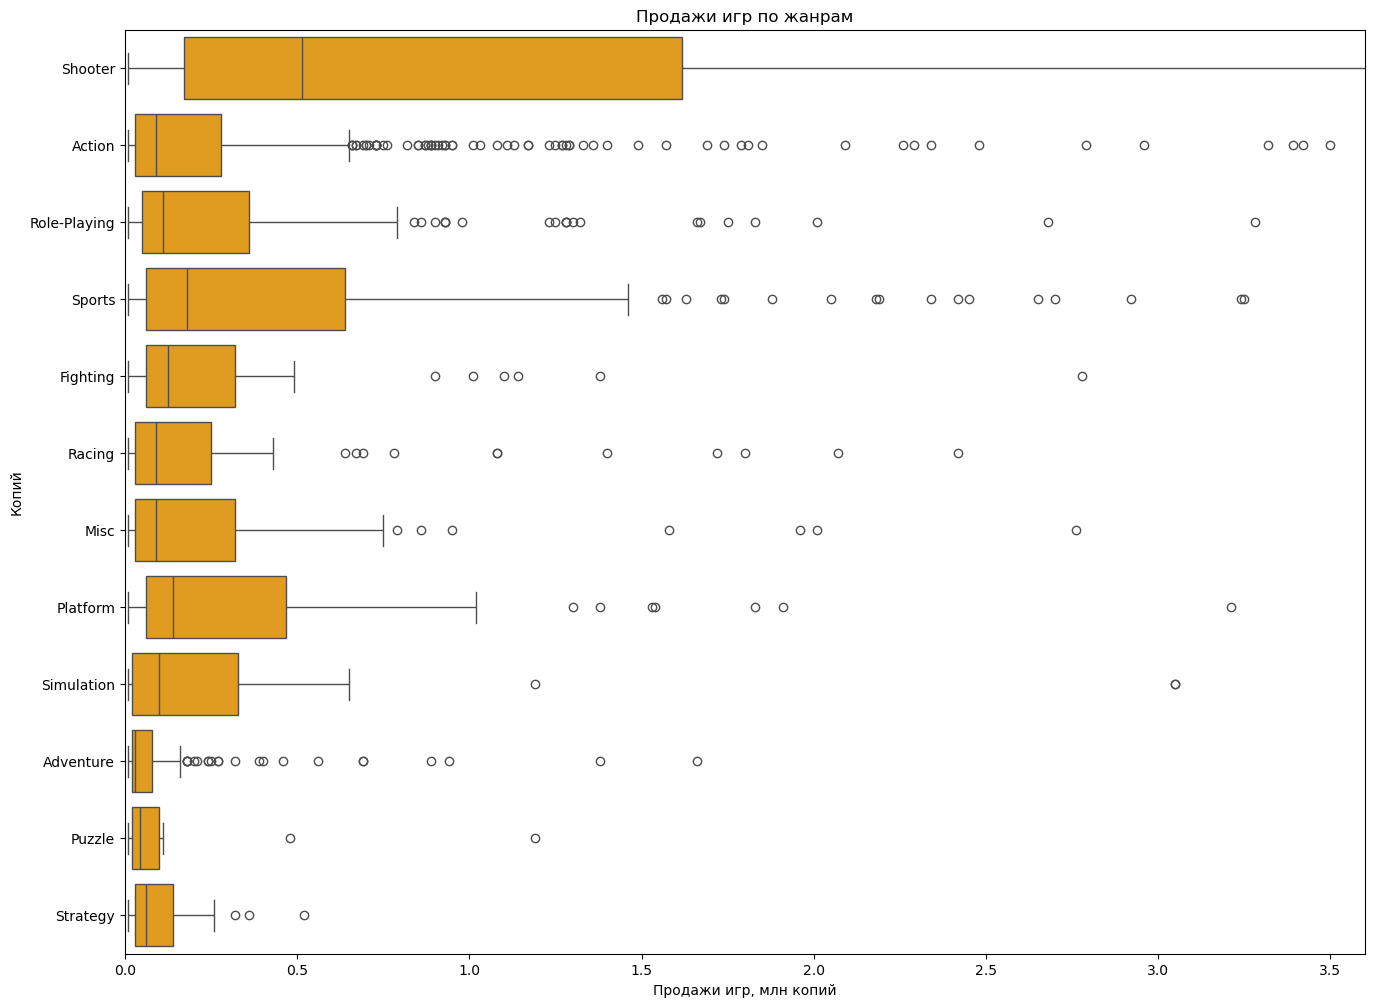

In [250]:
plt.figure(figsize=(16, 12))
sns.boxplot(x="total_sales", y="genre", data=data, color="orange", orient="h")
plt.title("Продажи игр по жанрам")
plt.xlabel("Продажи игр, млн копий")
plt.ylabel("Копий")
plt.xlim(0, 3.6)
plt.show()

Построим диаграмму размаха, чтобы посмотреть "индивидуальные" значения.
Обычно лучше всего продаётся игра жанра Shooter - почти 500 тысяч копий. Action здесь даже не на третьем месте, хотя это лидер по суммарным продажам. Самые продаваемые игры глобально приходятся на жанры Shooter, Sports и Platform. 

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) в долях продаж в разных регионах

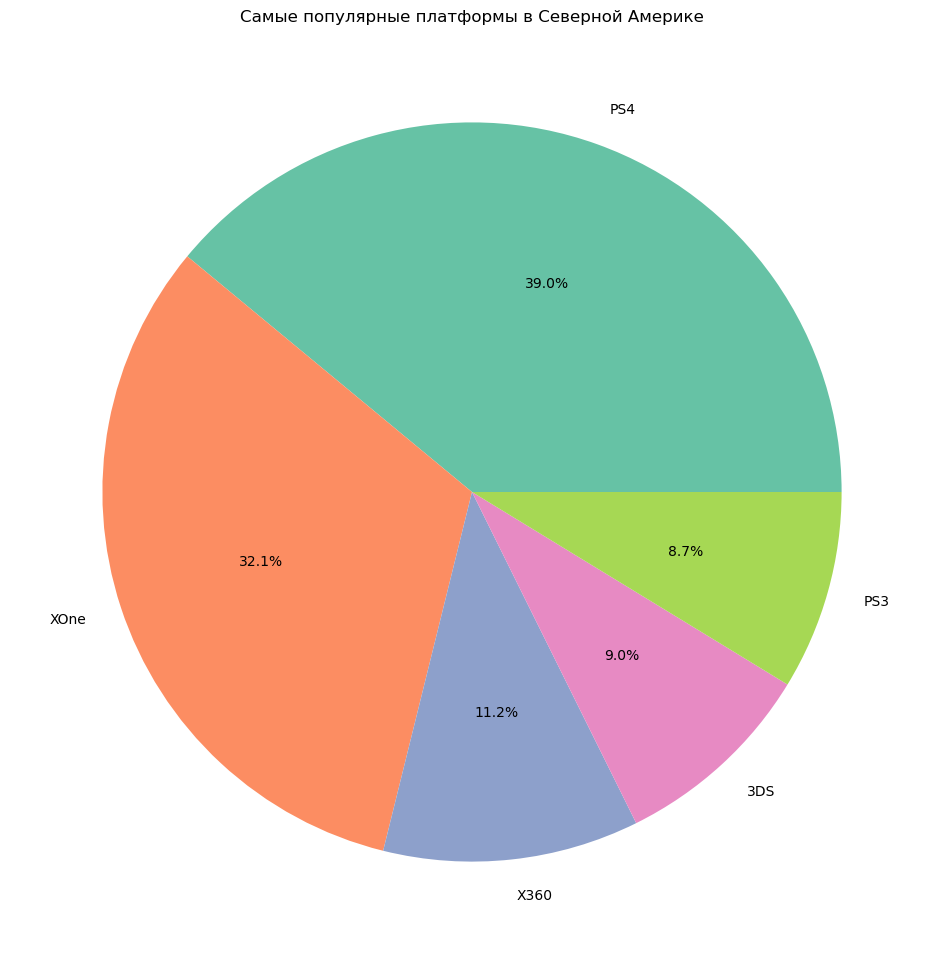

In [252]:
def platform_share(region, name):
    data.pivot_table(index="platform", values=region, aggfunc="sum").sort_values(
        by=region, ascending=False
    ).head().plot(
        kind="pie",
        y=region,
        autopct="%1.1f%%",
        legend=None,
        colors=sns.color_palette("Set2"),
        figsize=(12, 12),
    )
    plt.title(f"Самые популярные платформы в {name}")
    plt.ylabel("")
    plt.show()


platform_share("na_sales", "Северной Америке")

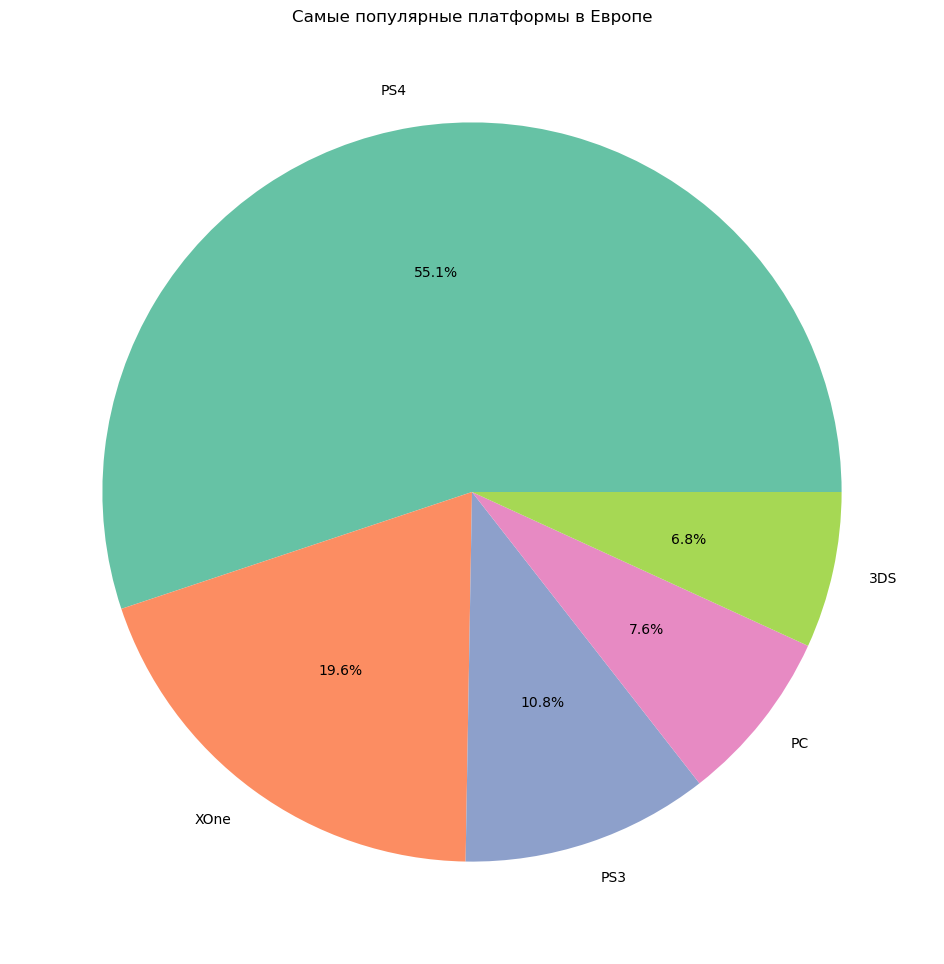

In [254]:
platform_share("eu_sales", "Европе")

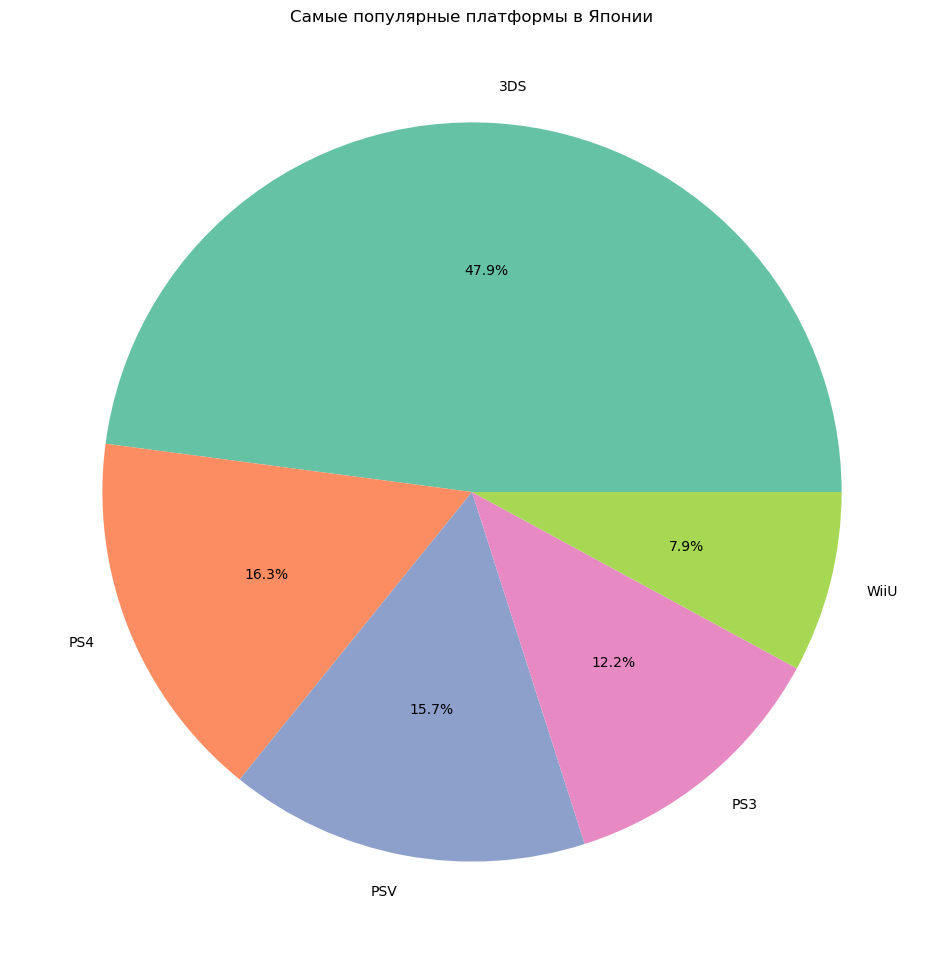

In [256]:
platform_share("jp_sales", "Японии")

В Северной Америке и Европе больше предпочитают платформы PS4 и XOne. Также в Северной Америке пятёрку замыкает 3DS, a в Европе PC. В Японии предпочитают платформы собственного производства, особенно Nintendo 3DS, а про Xbox почти не слышали.

### Самые популярные жанры (топ-5) в долях продаж в разных регионах

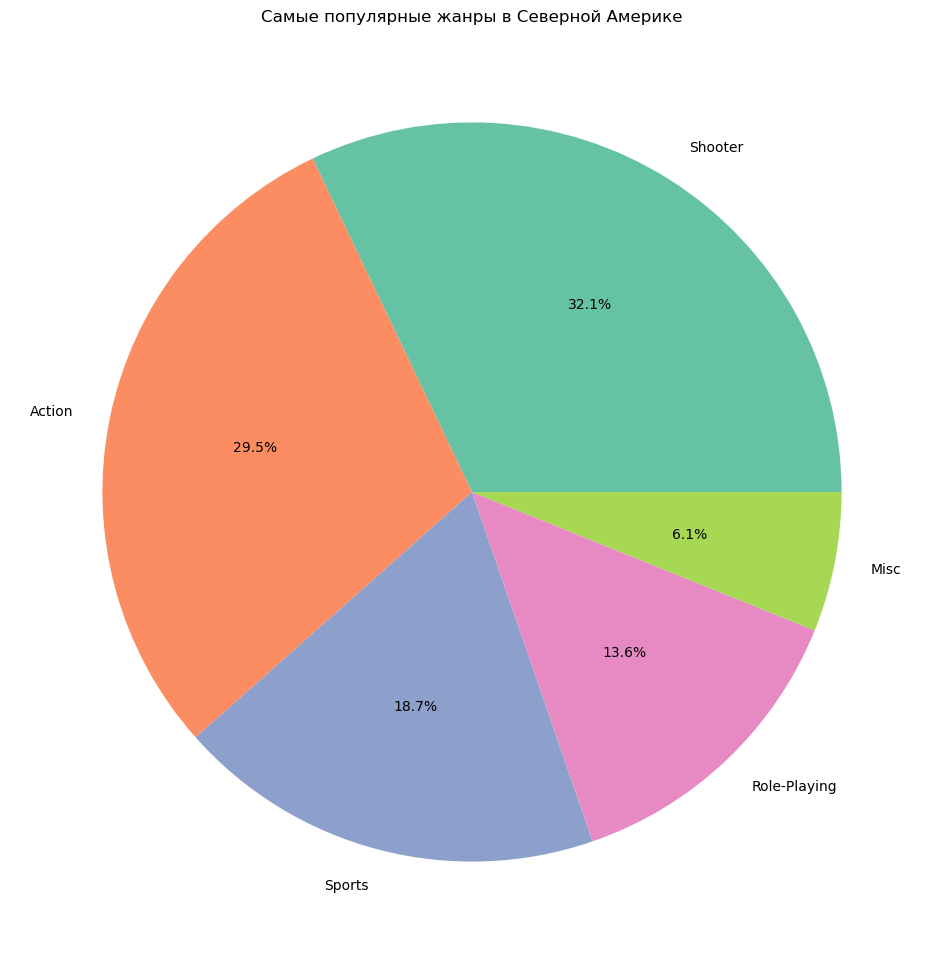

In [258]:
def genre_share(region, name):
    data.pivot_table(index="genre", values=region, aggfunc="sum").sort_values(
        by=region, ascending=False
    ).head().plot(
        kind="pie",
        y=region,
        autopct="%1.1f%%",
        legend=None,
        colors=sns.color_palette("Set2"),
        figsize=(12, 12),
    )
    plt.title(f"Самые популярные жанры в {name}")
    plt.ylabel("")
    plt.show()


genre_share("na_sales", "Северной Америке")

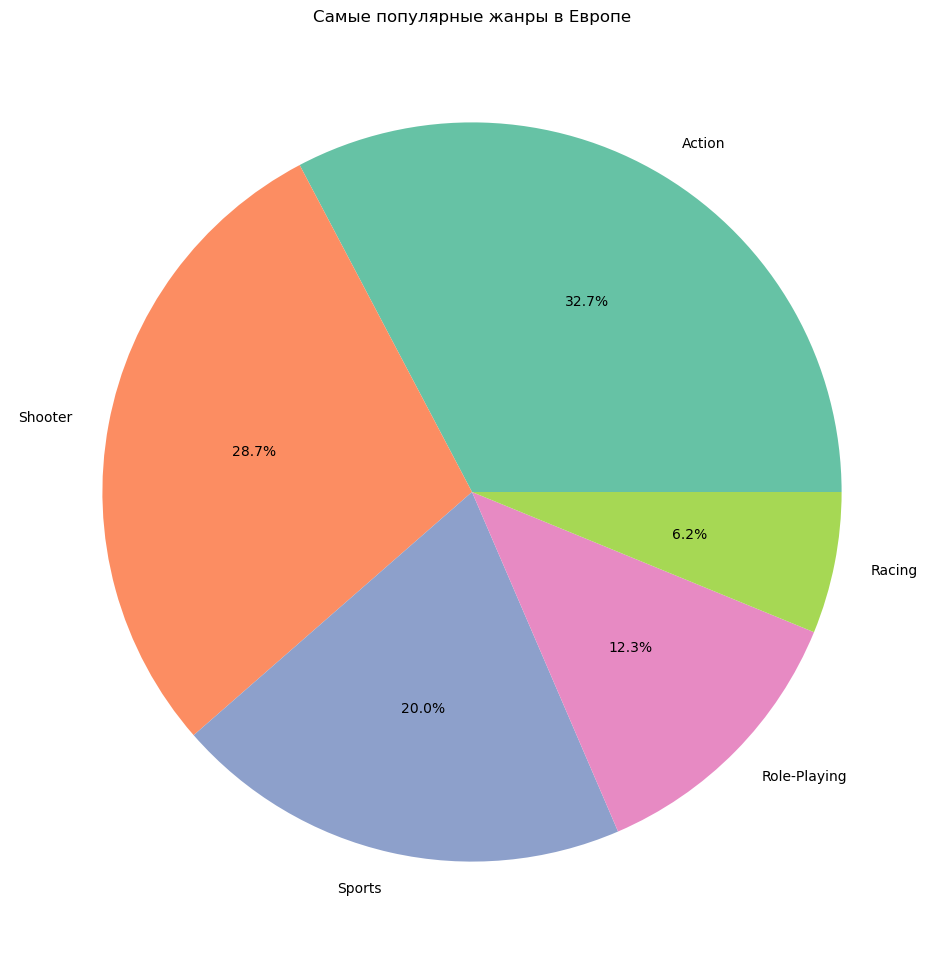

In [260]:
genre_share("eu_sales", "Европе")

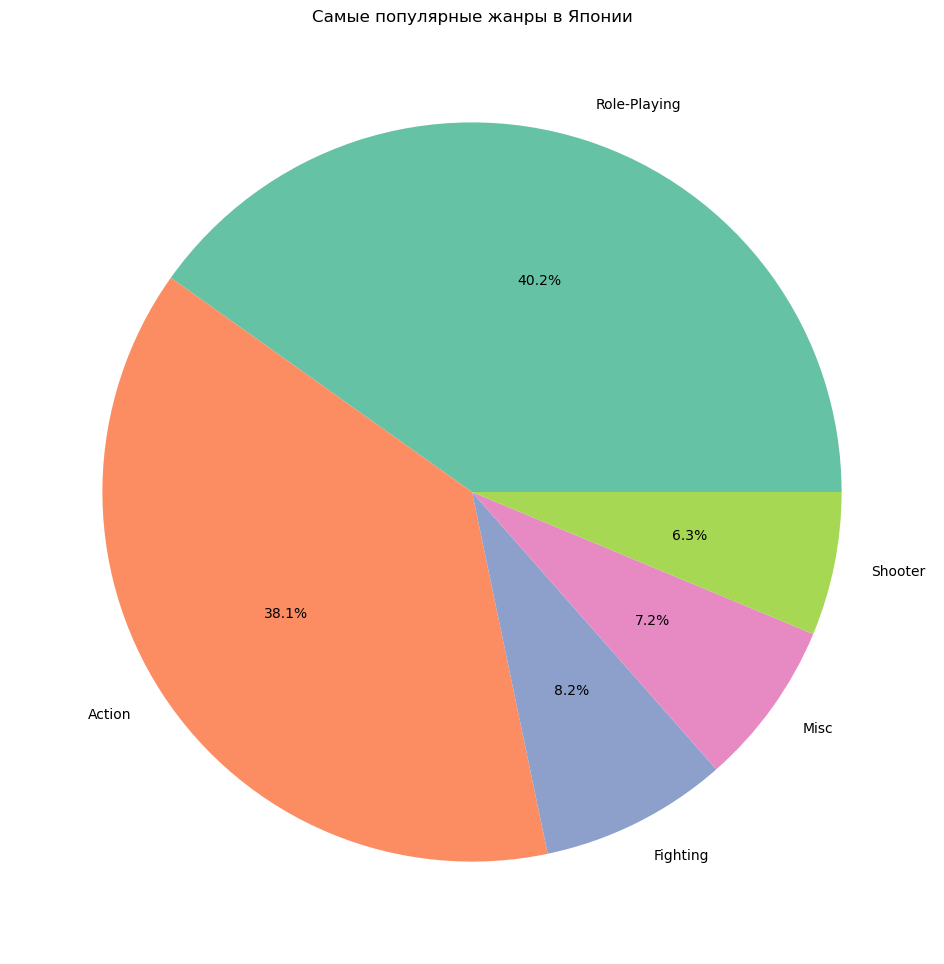

In [262]:
genre_share("jp_sales", "Японии")

В Северной Америке и Европе практически аналогичная доля продаж по жанрам игр с преобладанием жанра Shooter, а на втором месте Action. В Японии самый популярный жанр другой - Role-Playing. На втором месте также Action.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
* E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

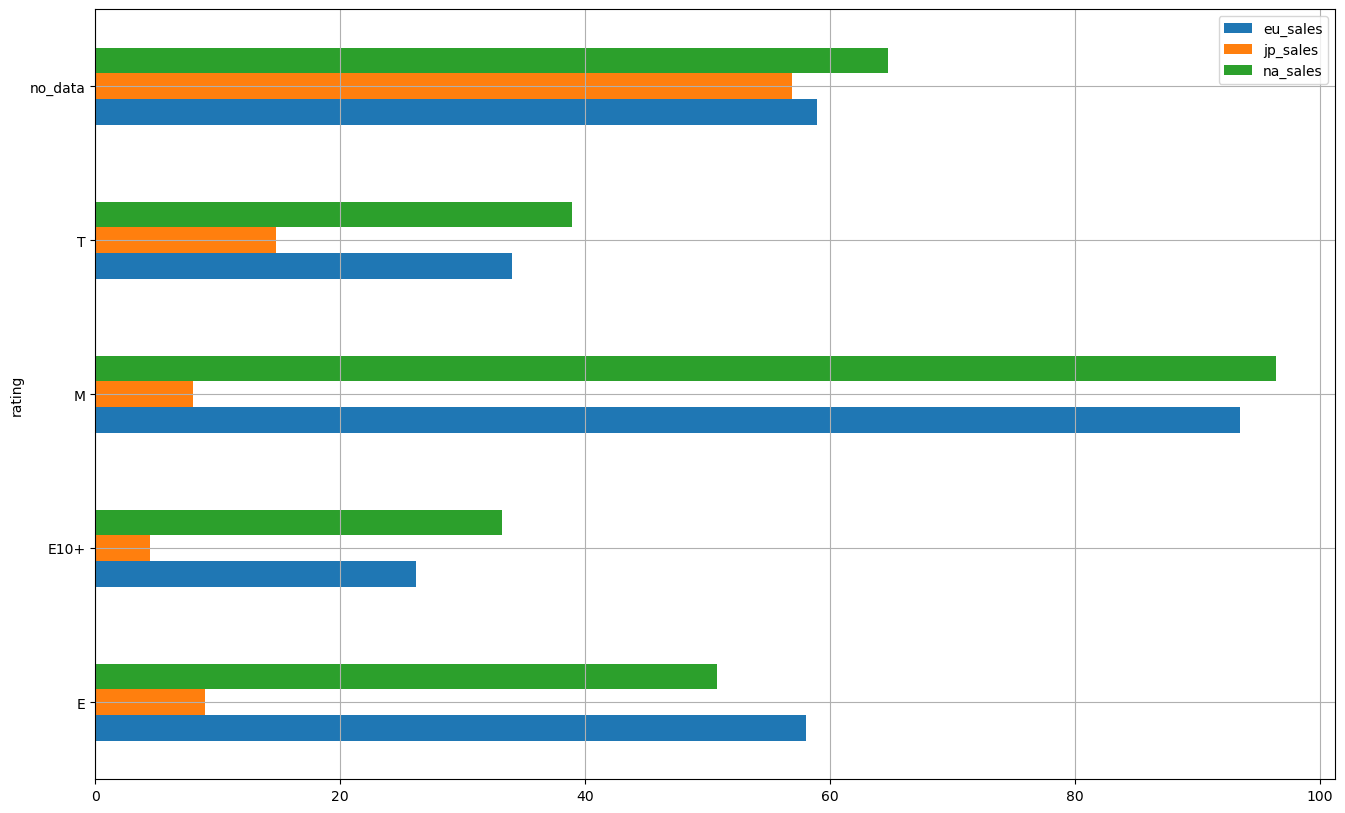

In [263]:
# Заполним пропуски заглушкой:
data["rating"] = data["rating"].fillna("no_data")

data.pivot_table(
    index="rating", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
).plot(kind="barh", figsize=(16, 10), grid=True)
plt.show()

В Северной Америке большая доля игр продаются с рейтингом "М". В Европе он так же лидирует, но с чуть меньшим запасом. 
В Японии же другая картина - самые популярные игры с рейтингом "Е"(там, где он есть).

## Общий вывод

Из открытых источников получены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Взят срез данных за 3 года, то есть с момента выхода актульного поколения платформ и выявлены определяющие успешность игры закономерности.

**Составлен портрет пользователя каждого региона**:

**Северная Америка и Европа**:
* Самые популярные платформы: PS4 и XOne.
* Самые популярные жанры: Shooter и Action.
* Рейтинг ESRB: "M" и "E".
* Корреляция оценок пользователей с продажами отсутствует.
* Корреляция оценок критиков с продажами данных платформ средняя.

**Япония**:
* Самые популярные платформы: Nintendo 3DS(48%).
* Самые популярные жанры: Role-Playing и Action.
* Рейтинг ESRB: "T", но не столь важно.
* Корреляция оценок пользователей с продажами  очень слабая.
* Корреляция оценок критиков с продажами  слабая.

На основании приведённых данных рекомендуется планировать рекламные кампании на будущий год.